<a href="https://colab.research.google.com/github/alxmzr/Colab/blob/main/AIRBNB_Google_Sheets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

worksheet = gc.open('Airbnb Open Data').sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()
# print(rows)

# Convert to a DataFrame and render.
import pandas as pd
df = pd.DataFrame.from_records(rows)

#creating columns name
df.columns = df.iloc[0]
df = df.iloc[1:]
df.head()

In [ ]:
df['reviews_per_month_new'] = df['reviews_per_month'].apply(lambda x: '0' if x == '' else x)

In [ ]:
new_df_schema = {
'Neighborhood Group': df['neighbourhood_group'].astype(str),
'Neighborhood': df['neighbourhood'].astype(str),
'Latitude': df['latitude'].astype(float),
'Longitude': df['longitude'].astype(float),
'Room Type': df['room_type'].astype(str),
'Price': df['price'].astype(float),
'Minimum Nights': df['minimum_nights'].astype(int),
'Number of Reviews': df['number_of_reviews'].astype(int),
'Reviews Per Month': df['reviews_per_month_new'].astype(float)
}

In [ ]:
airbnb_ny_df = pd.DataFrame(new_df_schema)
airbnb_ny_df.head()

,Neighborhood Group,Neighborhood,Latitude,Longitude,Room Type,Price,Minimum Nights,Number of Reviews,Reviews Per Month
1,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,9,0.21
2,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,0.38
3,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,0.00
4,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,270,4.64
5,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9,0.10


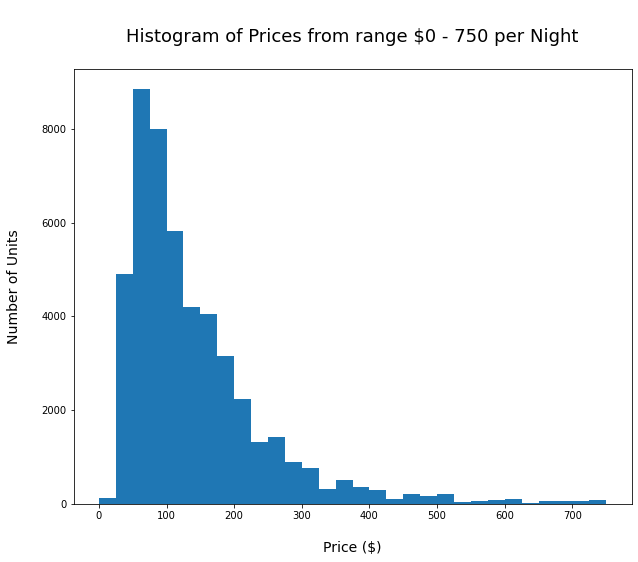

In [ ]:
plt.figure(figsize=(10,8))
plt.hist(airbnb_ny_df['Price'], bins=30, range=(0, 750))
plt.title('\nHistogram of Prices from range \\$0 - 750 per Night\n', fontsize=18)
plt.ylabel('Number of Units\n', fontsize=14)
plt.xlabel('\nPrice ($)', fontsize=14)
plt.show()

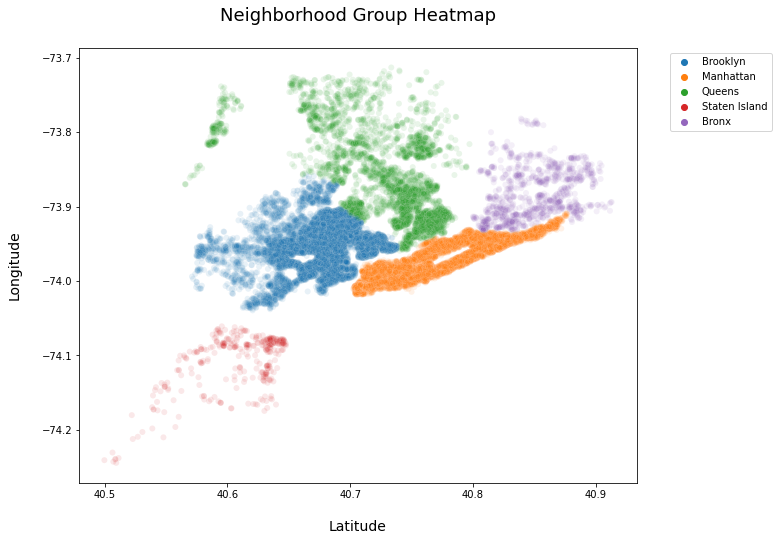

In [ ]:
#@title Visualizing neighborhood group density

import seaborn as sns

plt.figure(figsize=(10,8))
sns.scatterplot(x=airbnb_ny_df['Latitude'],
               y=airbnb_ny_df['Longitude'],
                hue=airbnb_ny_df['Neighborhood Group'],
                alpha=0.1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.title('Neighborhood Group Heatmap\n', fontsize=18)
plt.ylabel('Longitude\n', fontsize=14)
plt.xlabel('\nLatitude', fontsize=14)
plt.show()

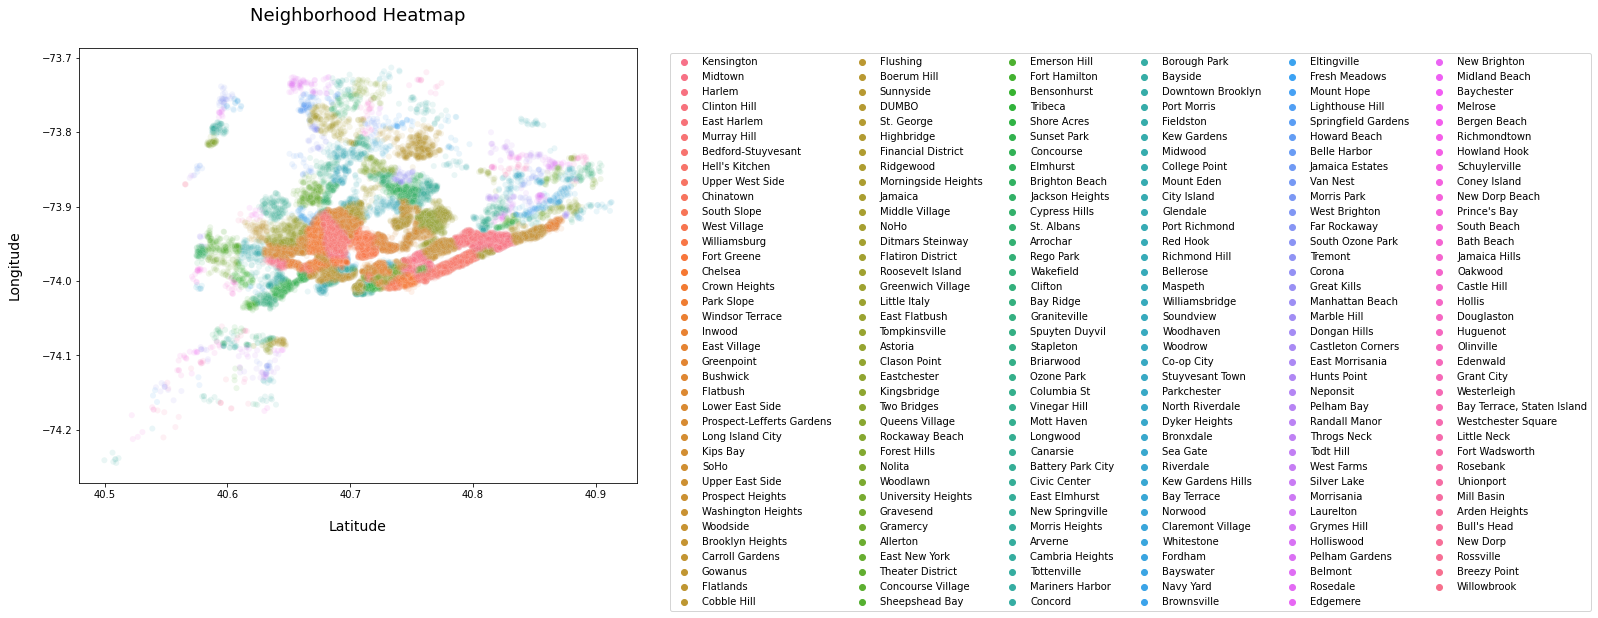

In [ ]:
#@title Visualizing neighborhood density

plt.figure(figsize=(10,8))
sns.scatterplot(x=airbnb_ny_df['Latitude'],
               y=airbnb_ny_df['Longitude'],
                hue=airbnb_ny_df['Neighborhood'],
                alpha=0.1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, ncol=6)
plt.title('Neighborhood Heatmap\n', fontsize=18)
plt.ylabel('Longitude\n', fontsize=14)
plt.xlabel('\nLatitude', fontsize=14)
plt.show()